In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

  # DATA CLEANING

In [6]:
ave = 614*0.05
df.dropna(thresh=ave, axis = 1, inplace=True)
df.shape

(614, 13)

In [7]:
df.Gender.fillna(method='ffill' ,inplace = True)
df.Married.fillna(method='ffill', inplace = True)

In [8]:
df['Dependents'] = df['Dependents'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Dependents'] = df['Dependents'].apply(lambda x: float(x))
df['Dependents'].fillna(0, inplace = True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df['Self_Employed'].fillna(method='ffill', inplace = True)

In [10]:
loan_a_mean = df['LoanAmount'].mean()
loan_a_term_mean = df['Loan_Amount_Term'].mean()
credit_m = df['Credit_History'].mode()
credit_m[0]
# df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda n : float(n))

1.0

In [11]:
df['LoanAmount'].fillna(loan_a_mean, inplace = True)
df['Loan_Amount_Term'].fillna(loan_a_term_mean, inplace=True)



In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
df['Credit_History'].fillna(credit_m[0], inplace = True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [16]:
credit_history = pd.crosstab([df['Gender'], df['Married']], df['Credit_History'])
credit_history

Credit_History  0.0  1.0
Gender Married          
Female No        13   69
       Yes        4   28
Male   No        19  113
       Yes       53  315

In [17]:
credit_history.plot(kind = 'bar')

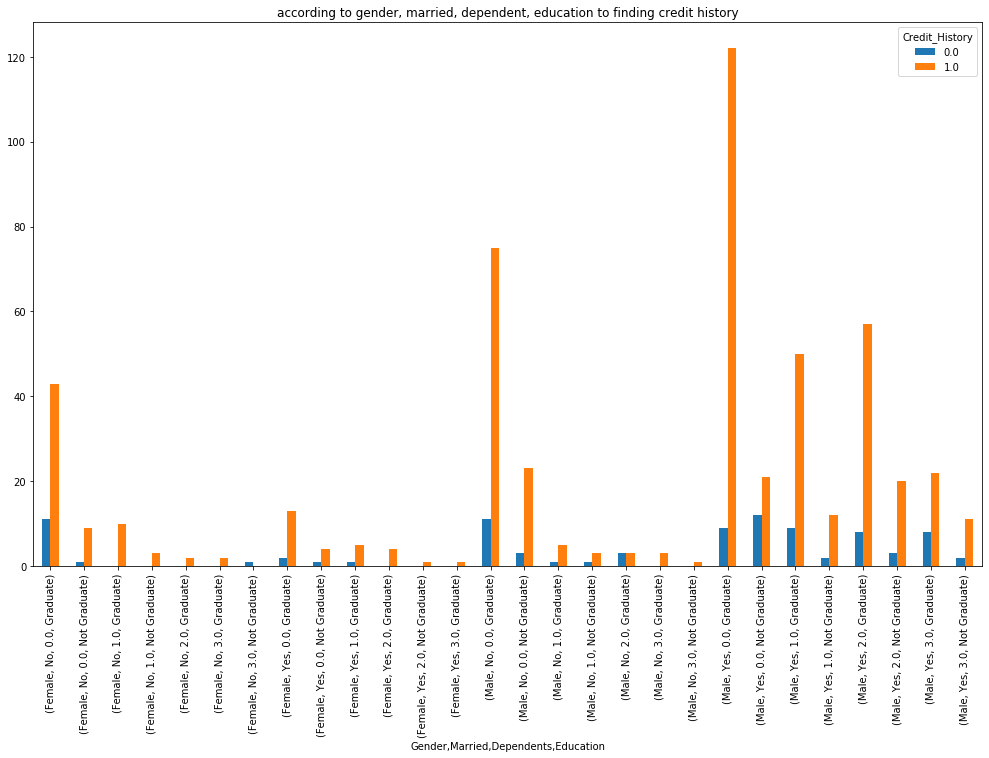

In [18]:
pd.crosstab([df['Gender'], df['Married'], df['Dependents'], df['Education']], df['Credit_History']).plot(kind = 'bar', figsize = (17, 10), title = 'according to gender, married, dependent, education to finding credit history')

In [19]:
df[(df["Gender"] == 'Male') & (df['Self_Employed'] == 'No') & (df['Credit_History'] == 1) & (df['ApplicantIncome'] > 12000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3.0,Graduate,No,12500,3000.0,320.000000,360.0,1.0,Rural,N
102,LP001350,Male,Yes,0.0,Graduate,No,13650,0.0,146.412162,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1.0,Graduate,No,14583,0.0,185.000000,180.0,1.0,Rural,Y
171,LP001585,Male,Yes,3.0,Graduate,No,51763,0.0,700.000000,300.0,1.0,Urban,Y
183,LP001637,Male,Yes,1.0,Graduate,No,33846,0.0,260.000000,360.0,1.0,Semiurban,N
258,LP001859,Male,Yes,0.0,Graduate,No,14683,2100.0,304.000000,360.0,1.0,Rural,N
278,LP001907,Male,Yes,0.0,Graduate,No,14583,0.0,436.000000,360.0,1.0,Semiurban,Y
284,LP001922,Male,Yes,0.0,Graduate,No,20667,0.0,146.412162,360.0,1.0,Rural,N
308,LP001996,Male,No,0.0,Graduate,No,20233,0.0,480.000000,360.0,1.0,Rural,N


In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
male_cr = (df['Gender'] == 'Male') & (df['Credit_History'] == 1)
male_cr.mean() 

0.6970684039087948

In [22]:
female_cr = (df['Gender'] == 'Female') & (df['Credit_History'] == 1)
female_cr.mean()

0.15798045602605862

In [23]:
female_not_cr = (df['Gender'] == 'Female') & (df['Credit_History'] == 0)
female_not_cr.mean()

0.02768729641693811

In [24]:
male_not_cr = (df['Gender'] == 'Male') & (df['Credit_History'] == 0)
male_not_cr.mean()

0.11726384364820847

In [25]:
female_not_cr.mean() + male_not_cr.mean() + male_cr.mean() + female_cr.mean()

0.9999999999999999